{C1: -1/4, C3: -5/4, C4: 1/2}


ImportError: attempted relative import with no known parent package

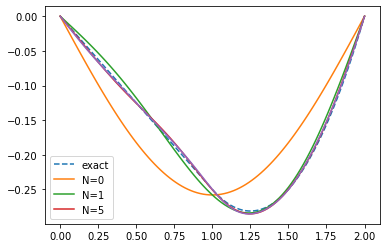

<Figure size 432x288 with 0 Axes>

In [1]:
import os, sys
sys.path.insert(0, os.path.join(os.pardir, 'src'))

def sympy_solution():
    from sympy import symbols, Rational, solve
    C1, C3, C4 = symbols('C1 C3 C4')
    s = solve([C1 - 1 - C3,
           C1 - Rational(1,2) - C3 - C4,
	   2 + 2*C3 + C4], [C1,C3,C4])
    return s

import numpy as np
import matplotlib.pyplot as plt

def plot_exact_solution():
    x = np.linspace(0, 2, 101)
    u = exact_solution(x)
    plt.plot(x, u)
    plt.xlabel('$x$'); plt.ylabel('$u$')
    ax = plt.gca(); ax.set_aspect('equal')
    plt.savefig('tmp.png');  plt.savefig('tmp.pdf')

def exact_solution(x):
    if isinstance(x, np.ndarray):
        return np.where(x < 1, -1./4*x, 0.5*x**2 - 5./4*x + 0.5)
    else:
        return -1./4*x if x < 1 else 0.5*x**2 - 5./4*x + 0.5

def sine_solution(x, N):
    from numpy import pi, sin
    s = 0
    u = [] # u[i] is the solution for N=i
    for i in range(N+1):
        if i % 4 == 0:
            cos_min_cos = -1
        elif (i-1) % 4 == 0:
            cos_min_cos = 2
        elif (i-2) % 4 == 0:
            cos_min_cos = -1
        elif (i-1) % 4 == 0:
            cos_min_cos = 0

        b_i = 2/(pi*(i+1))*cos_min_cos
        A_ii = (i+1)**2*pi**2/4
        c_i = b_i/A_ii
        s += c_i*sin((i+1)*x*pi/2)
        u.append(s.copy())
    return u

def plot_sine_solution():
    x = np.linspace(0, 2, 101)
    u = sine_solution(x, N=20)
    plt.figure()
    x = np.linspace(0, 2, 101)
    plt.plot(x, exact_solution(x), '--')
    N_values = 0, 1, 5
    for N in 0, 1, 5, 10:
        plt.plot(x, u[N])
    plt.legend(['exact'] + ['N=%d' % N for N in N_values])
    plt.savefig('tmp2.png');  plt.savefig('tmp2.pdf')

def P1_solution():
    plt.figure()
    from fe1D import mesh_uniform, u_glob
    N_e_values = [2, 4, 8]
    d = 1
    legends = []
    for N_e in N_e_values:
        vertices, cells, dof_map = mesh_uniform(
            N_e=N_e, d=d, Omega=[0,2], symbolic=False)
        h = vertices[1] - vertices[0]
        Ae = 1./h*np.array(
            [[1, -1],
             [-1, 1]])
        N = N_e + 1
        A = np.zeros((N, N))
        b = np.zeros(N)
        for e in range(N_e):
            if vertices[e] >= 1:
                be = -h/2.*np.array(
                    [1, 1])
            else:
                be = h/2.*np.array(
                    [0, 0])
            for r in range(d+1):
                for s in range(d+1):
                    A[dof_map[e][r], dof_map[e][s]] += Ae[r,s]
                b[dof_map[e][r]] += be[r]
        # Enforce boundary conditions
        A[0,:] = 0; A[0,0] = 1; b[0] = 0
        A[-1,:] = 0; A[-1,-1] = 1; b[-1] = 0
        c = np.linalg.solve(A, b)

        # Plot solution
        print(('c:', c))
        print(('vertices:', vertices))
        print(('cells:', cells))
        print(('len(cells):', len(cells)))
        print(('dof_map:', dof_map))
        xc, u, nodes = u_glob(c, vertices, cells, dof_map)
        plt.plot(xc, u)
        legends.append('$N_e=%d$' % N_e)
    plt.plot(xc, exact_solution(xc), '--')
    legends.append('exact')
    plt.legend(legends, loc='lower left')
    plt.savefig('tmp3.png'); plt.savefig('tmp3.pdf')

if __name__ == '__main__':
    print((sympy_solution()))
    plot_sine_solution()
    P1_solution()
    plt.show()
